In [31]:
import numpy as np
import pandas as pd
import nltk

%matplotlib inline

In [32]:
import re

def load_stopwords(filename):
    stopwords = []
    with open('stopwords', 'r') as f:
        for word in f:
            stopwords.append(word.strip())
    return stopwords

def remove_stopwords(stopwords, tokens):
    res = []
    for token in tokens:
        if token not in stopwords:
            res.append(token)
    return res

def reduce_whitespaces(text):
    return re.sub(r"[\s\n]+", " ", text)

def remove_punctuations(text):
    text = re.sub(r"[()-_:.;!,*]+", " ", text)
    return re.sub(u'[—]+', ' ', text)
    

In [33]:
stopwords = load_stopwords('stopwords')

In [34]:
data = pd.read_csv('data/response.csv')

In [35]:
data.head(10)

,Timestamp,First Name,Last Name,Email,Contact No.,College/Organization,Level,Skills/Experience,Have you attended any of our workshops?,What are your expectations from this workshop? (Optional),Any relevant AI projects you have done (Optional)
0,4/28/2018 23:14:53,Krishna,KC,krishnakc2339@gmail.com,9840603624,Deerwalk Services Pvt. Ltd,Beginner,"Python, Other Programming Languages",No,Learn basics of AI and machine learning.,Not yet.
1,4/28/2018 23:15:56,Ashis,Giri,protechie2017@gmail.com,9869086947,Ascol,Beginner,"Python, Other Programming Languages",No,NaN,NaN
2,4/28/2018 23:16:23,Suraj,Joshi,surajjoshi0123@gmail.com,9779868853509,Kantipur Engineering College,Beginner,"Python, Numpy, Other Programming Languages, C,C++",Yes,NaN,NaN
3,4/28/2018 23:17:37,Anish,Bhusal,bhusal.anish12@gmail.com,9844750725,Pulchowk Campus,Intermediate I,"Python, Numpy, Pandas, Scikit-Learn, Tensorflo...",Yes,I hope this workshop further boosts my skill l...,NaN
4,4/28/2018 23:19:08,Prakash singh,Madai,P.cityzen17@gmail.com,9861396264,Himalaya college of engineering,Intermediate I,"Python, Pandas, Scikit-Learn, Other Programmin...",No,Getting better knowledge of machine learning,Yes
5,4/28/2018 23:28:02,Rojan,Shiwakoti,arojaneres@gmail.com,9863680654,Islington College / Innovake P. Ltd.,Intermediate II,"Python, Numpy, Pandas, Scikit-Learn, Neural Ne...",No,"networking, workshop with experts, learning an...",currently working on facial recognition with n...
6,4/28/2018 23:29:39,Adarsha,Acharya,adarshaofficial@gmail.com,9865055831,ACHS,Beginner,Other Programming Languages,Yes,Get beginning knowledge about numpy and pandas.,NaN
7,4/28/2018 23:30:46,Dipesh,Shrestha,dexter.shrestha10@gmail.com,9843702666,ACEM,Intermediate II,"Python, Numpy, Pandas, Scikit-Learn",No,NaN,NaN
8,4/28/2018 23:43:07,Sakar,Ghimire,mesakarghm@gmail.com,9860382729,New Summit College,Beginner,Other Programming Languages,No,All the basic knowledge to kickstart AI carreer,NaN
9,4/29/2018 0:03:34,Suman,Gautam,piratekingsuman@gmail.com,9821138158,Patan College for professional studies,Beginner,"Python, Numpy, Neural Networks, Tensorflow, Ot...",Yes,Basic level of knowledge for new comers and a ...,I am currently learning about neural networks....


In [36]:
data.rename(columns={
    'First Name' : 'fn', 
    'Last Name' : 'ln', 
    'Level' : 'level',
    'Email' : 'email',
    'Contact No.' : 'contact',
    'College/Organization' : 'organization',
    'Skills/Experience' : 'skills',
    'Have you attended any of our workshops?' : 'attended_before',
    'What are your expectations from this workshop? (Optional)' : 'expectation',
    'Any relevant AI projects you have done (Optional)' : 'projects'
    
}, inplace=True)

In [37]:
# fill empty text
data['expectation'].fillna('', inplace=True)

In [38]:
data.head(10)

,Timestamp,fn,ln,email,contact,organization,level,skills,attended_before,expectation,projects
0,4/28/2018 23:14:53,Krishna,KC,krishnakc2339@gmail.com,9840603624,Deerwalk Services Pvt. Ltd,Beginner,"Python, Other Programming Languages",No,Learn basics of AI and machine learning.,Not yet.
1,4/28/2018 23:15:56,Ashis,Giri,protechie2017@gmail.com,9869086947,Ascol,Beginner,"Python, Other Programming Languages",No,,NaN
2,4/28/2018 23:16:23,Suraj,Joshi,surajjoshi0123@gmail.com,9779868853509,Kantipur Engineering College,Beginner,"Python, Numpy, Other Programming Languages, C,C++",Yes,,NaN
3,4/28/2018 23:17:37,Anish,Bhusal,bhusal.anish12@gmail.com,9844750725,Pulchowk Campus,Intermediate I,"Python, Numpy, Pandas, Scikit-Learn, Tensorflo...",Yes,I hope this workshop further boosts my skill l...,NaN
4,4/28/2018 23:19:08,Prakash singh,Madai,P.cityzen17@gmail.com,9861396264,Himalaya college of engineering,Intermediate I,"Python, Pandas, Scikit-Learn, Other Programmin...",No,Getting better knowledge of machine learning,Yes
5,4/28/2018 23:28:02,Rojan,Shiwakoti,arojaneres@gmail.com,9863680654,Islington College / Innovake P. Ltd.,Intermediate II,"Python, Numpy, Pandas, Scikit-Learn, Neural Ne...",No,"networking, workshop with experts, learning an...",currently working on facial recognition with n...
6,4/28/2018 23:29:39,Adarsha,Acharya,adarshaofficial@gmail.com,9865055831,ACHS,Beginner,Other Programming Languages,Yes,Get beginning knowledge about numpy and pandas.,NaN
7,4/28/2018 23:30:46,Dipesh,Shrestha,dexter.shrestha10@gmail.com,9843702666,ACEM,Intermediate II,"Python, Numpy, Pandas, Scikit-Learn",No,,NaN
8,4/28/2018 23:43:07,Sakar,Ghimire,mesakarghm@gmail.com,9860382729,New Summit College,Beginner,Other Programming Languages,No,All the basic knowledge to kickstart AI carreer,NaN
9,4/29/2018 0:03:34,Suman,Gautam,piratekingsuman@gmail.com,9821138158,Patan College for professional studies,Beginner,"Python, Numpy, Neural Networks, Tensorflow, Ot...",Yes,Basic level of knowledge for new comers and a ...,I am currently learning about neural networks....


In [39]:
# get stats of lat name
print(pd.Series(data['ln']).value_counts())

# get stats of first name
print(pd.Series(data['fn']).value_counts())

Shrestha       24
Joshi           8
Maharjan        8
Acharya         5
Poudel          4
Dhakal          4
Rai             4
Gautam          4
Baniya          3
Thapa           3
Bhandari        3
Karki           3
Gyawali         3
Panthi          3
Adhikari        3
Sharma          3
Pradhan         3
Tandukar        3
Ghimire         3
Maharjan        2
Bajracharya     2
Tuladhar        2
Dangol          2
Shakya          2
Shahi           2
Ojha            2
Khadka          2
Pathak          2
Shrestha        2
Subedi          2
               ..
Khergoli        1
mishra          1
Khatry          1
Dhungana        1
Dhungana        1
Koirala         1
Chalise         1
Chapagain       1
Uprety          1
Timilsina       1
Baral           1
Bhusal          1
karki           1
Marahatta       1
Kapali          1
Bhattarai       1
Khadgi          1
koirala         1
Kafle           1
sah             1
Sipai           1
Rajbhandari     1
Banstola        1
Giri            1
Oli       

In [40]:
expectation = ' '.join(data['expectation']).lower()
expectation = reduce_whitespaces(remove_punctuations(expectation))

In [41]:
tokens = nltk.word_tokenize(expectation)
tokens = remove_stopwords(stopwords, tokens)

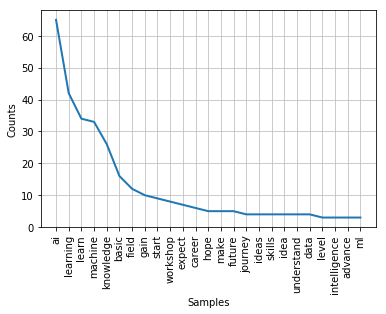

In [44]:
%matplotlib inline
freq = nltk.FreqDist(tokens)
freq.plot(25, cumulative=False)